In [3]:
import gc # garbage collector
import numpy as np # linear algebra
from collections import Counter # for counting commong words
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
plt.style.use('fivethirtyeight') # use ggplot ploting style
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS # this module is for making wordcloud in python
import re # regular expression
import string # for finding punctuation in text
import nltk
nltk.download('stopwords')# preprocessing text
nltk.download('wordnet')
from textblob import TextBlob
#import ploty for visualization
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')
# remove war
import warnings
warnings.filterwarnings('ignore')
# this will allow ploting inside the notebook
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

import nltk
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
import pandas as pd
reviews_dataset = pd.read_csv('foodonreviews.csv')
reviews_dataset.drop('Unnamed: 0',axis=1,inplace= True)
reviews_dataset

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category8,category9,category10,date,review_id,stars_y,text,user_id,year,name_y
0,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2012-12-21,1K3I3fbsaSun9Al4ZLtAuw,5,love this place! its my new go to Thai restaur...,2dPAIXLPnRAdmjv5c-n1vw,2012,thai one on
1,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-10-31,4XeOuvBOkOkti2R5wmnyyg,1,Part of my order was missing. There were hard ...,HkKKAw2PAWVxuuooFkNFVQ,2013,thai one on
2,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2014-03-01,4AYMyDvSbjjkIgnZqnfMYQ,1,Really slow delivery and almost no chicken in ...,0WRUJ_yi5mqM9Qz8nOYxeQ,2014,thai one on
3,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-09-14,BrZ_MMwFsmt5DyLBoIHnQw,1,Visited this site 3 times with Groupon. \nSi...,QnR9A0VHuT4rtSdgaLmIBQ,2013,thai one on
4,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-12-22,wZJK7LQ3KKPlg4wA9WXM3w,3,"This place is sub-par, but my bf swears by the...",LiNx18WUre9WFCEQlUhtKA,2013,thai one on
5,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2013-05-20,QTs4UfT3sLMkT9OVNds2ag,1,Last visit. Ever.\nAnother groupon and one mor...,6iZ4KZDyIimYFUN3rbRZEg,2013,thai one on
6,True,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3417 derry road e, unit 103",...,NaN,NaN,NaN,2012-08-17,QzFzdW5otW72rkN7I1zMng,2,I had the Pad Thai with chicken and shrimp it ...,5JfchbYrvSLUL5_HTohjOQ,2012,thai one on
7,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2015-07-12,zIs4h9IDEwwPNjAbX0q3jw,5,Such a cute bakery with welcoming and friendly...,7eX01e821qiLbvoQQpNmIw,2015,mabel's bakery
8,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2015-09-24,jukJjtrCkYlmeTVtleAEiA,1,I was a huge fan of Mabels until I bought a ca...,OXDIm9gqgtedByYC_D7Vig,2015,mabel's bakery
9,True,2,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,7:30-19:0,8:0-18:0,9:0-18:0,746 street clair avenue w,...,NaN,NaN,NaN,2016-02-08,V0WqiEsdi53fAHGF33u6Sg,3,My wife and I go to Mabel's every Saturday mor...,B0eKmqtOI7_HQu0DYK-Dzg,2016,mabel's bakery


In [7]:
# reviews_dataset.shape[0] - gives number of row count
print("Total No. of Reviews: {}".format(reviews_dataset.shape[0]))

Total No. of Reviews: 482384


In [8]:
reviews_dataset.shape

(482384, 36)

In [10]:
# TEST 
# get_clean_text()
sample_review = reviews_dataset.text[28]

'first time got 4 square desserts lemon triple choco brownie orange pecan sour cherry pie pleasant surprise every single dessert delicious amount sugar right every creation flavourful name suggests cherry pie spectacular tasted fresh definitely back'

In [44]:
reviews_dataset.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'address', 'business_id', 'city', 'latitude', 'longitude', 'name_x',
       'neighborhood', 'review_count', 'stars_x', 'state', 'category1',
       'category2', 'category3', 'category4', 'category5', 'category6',
       'category7', 'category8', 'category9', 'category10', 'date',
       'review_id', 'text', 'user_id', 'year', 'name_y'],
      dtype='object')

In [48]:
reviews_dataset["stars_y"].value_counts()
#type(reviews_dataset["stars_y"].value_counts())

4    157550
5    139187
3     87925
1     48917
2     48805
Name: stars_y, dtype: int64

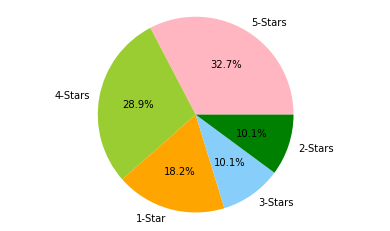

In [15]:
labels = '5-Stars', '4-Stars', '1-Star', '3-Stars', '2-Stars'
sizes = reviews_dataset["stars_y"].value_counts()
colors = ['lightpink', 'yellowgreen', 'orange', 'lightskyblue','green']
# Plot
plt.pie(sizes, labels=labels, colors =colors, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Loading clean data into texts list

In [17]:
from tqdm import tqdm_notebook as tqdm

In [18]:

%%time
# we're interested in the text of each review 
# and the stars rating, so we load these into 
# separate lists

texts = []
stars = [reviews_dataset['stars_y'] for review in reviews_dataset]
pbar = tqdm(total=reviews_dataset.shape[0]+1)
for index, row in reviews_dataset.iterrows():
    texts.append(get_clean_text(row['text']))
    pbar.update(1)
pbar.close()


Wall time: 12min 7s


In [ ]:
# Vectorizing our Text Data - the TF-IDF algorithm along with n-grams
# and tokenization (splitting the text into individual words).

In [19]:
%%time
# Estimated time: 29.8 s
from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,3))

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(texts)

Wall time: 28min 44s


## Splitting dataset into Train and test Data¶

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, stars[1], test_size=0.15, random_state=42, shuffle =False)

In [ ]:
# We now have 15% of our data in X_test and y_test. We’ll teach our system using 85%
# of the data (X_train and y_train), and then see how well it does by comparing its predictions for 
# the reviews in X_test with the real ratings in y_test.

## Fitting a Classifier and Making Predictions

The classifier we’ll use is a Linear Support Vector Machine (SVM), which has been shown to perform well on several text classifications tasks.



In [21]:
%%time
# Estimated time: 12.6 s
from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

Wall time: 17min 9s


In [22]:
# classifier has been fitted, it can now be used to make predictions. 
# predicting the rating for the first ten reviews in our test set

In [41]:
# Using our trained classifier to predict the ratings from text

preds = classifier.predict(X_test)
print("Actual Ratings(Stars): ",end = "")
display(y_test[:5])
print("Predicted Ratings: ",end = "")
print(preds[:5])

Actual Ratings(Stars): 

410026    4
410027    2
410028    5
410029    5
410030    5
Name: stars_y, dtype: int64

Predicted Ratings: [4 1 5 4 5]


## Observations 
#### Example: 
#### The model predicts a different rating(2) based on features of the review text, for acutal rating index 131527 (which is 1)

In [24]:
# Predicting for entire dataset

X_null, X_full_test, y_null, y_full_test = train_test_split(vectors, stars[1], test_size=0.999995, random_state=42, shuffle = False)
predict_all = classifier.predict(X_full_test)

In [42]:
predicted_stars = list(predict_all)

print("Actual Ratings(Stars): ")
print(y_full_test[481025:481036])
print("\nPredicted Ratings: ",end = "")
print(predicted_stars[481025:481036])

Actual Ratings(Stars): 
481027    3
481028    3
481029    5
481030    1
481031    3
481032    4
481033    2
481034    4
481035    3
481036    4
481037    3
Name: stars_y, dtype: int64

Predicted Ratings: [3, 4, 5, 4, 4, 5, 1, 3, 3, 4, 3]


In [51]:
reviews_dataset.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'address', 'business_id', 'city', 'latitude', 'longitude', 'name_x',
       'neighborhood', 'review_count', 'stars_x', 'state', 'category1',
       'category2', 'category3', 'category4', 'category5', 'category6',
       'category7', 'category8', 'category9', 'category10', 'date',
       'review_id', 'stars_y', 'text', 'user_id', 'year', 'name_y'],
      dtype='object')

In [62]:
unbiased_reviews_dataset.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'address', 'business_id', 'city', 'latitude', 'longitude', 'name_x',
       'neighborhood', 'review_count', 'stars_x', 'state', 'category1',
       'category2', 'category3', 'category4', 'category5', 'category6',
       'category7', 'category8', 'category9', 'category10', 'date',
       'review_id', 'text', 'user_id', 'year', 'name_y'],
      dtype='object')

In [ ]:
# Making new CSVs from dataframe

In [69]:
print("\nOriginal Reviews (with user bias)")
display(reviews_dataset.tail(10))

print("\nUnbiased Reviews (with predicted rating using user's review text)")
unbiased_reviews_dataset = reviews_dataset

# dropping actual ratings(stars) by user
unbiased_reviews_dataset = unbiased_reviews_dataset.drop('stars_y',1)

# adding the unbiased predicted rating
unbiased_reviews_dataset['stars_y'] = predicted_stars

display(unbiased_reviews_dataset.tail(10))


Original Reviews (with user bias)


,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category8,category9,category10,date,review_id,stars_y,text,user_id,year,name_y
482374,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2010-07-07,wl3Ppb-cCrM7yQDyL3zK-g,2,"I walked into a Smoothy/Espresso Bar, apparent...",Wu0yySWcHQ5tZ_59HNiamg,2010,mary brown's famous chicken & tater
482375,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2013-03-07,ZD11XthKI1Vt-JIqksYwjQ,2,Dropped in for lunch today while doing work vi...,V4TPbscN8JsFbEFiwOVBKw,2013,mary brown's famous chicken & tater
482376,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-03-14,TFFZgj6qd1Lvshd7lEC37g,2,Being from the east I thought I would treat my...,0LMHrFTQtUoY42AZl1MH6g,2014,mary brown's famous chicken & tater
482377,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-11-28,dYaP3h1A-tAtcNcOxvjUGA,3,"Surprisingly, this was my first visit to a To...",bKTB22B8f1o7q25Sn8aN2Q,2014,mary brown's famous chicken & tater
482378,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-11-29,1Knw1V0uPlwyC8DIeodR3w,1,Ordered 4 pieces of dark chicken. We were told...,-slqra9WnLQ0LGWwumzz-A,2017,mary brown's famous chicken & tater
482379,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-01-09,PNeYKAZOtdAFsDfzPG22Qg,2,"This place used to be good before the Reno, no...",13Q5M-NHuMbdGbovrwj1-w,2017,mary brown's famous chicken & tater
482380,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2015-04-30,gy23f7DIW4qPFEGcSlq80Q,3,Lady behind the counter ywas very nice. But w...,0v4sabX7a6r8blrGtzVKuw,2015,mary brown's famous chicken & tater
482381,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2016-12-20,48eEp-s7q5gQHONsSOg8-g,2,This place used to be better. \nI went there t...,j6UUXNC2HPHY7r4LOPqXEw,2016,mary brown's famous chicken & tater
482382,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-01-01,H00m4TaI6zd9TGviDBZn9A,5,I've been going to this place for years. To m...,G42CKchEYanXC2-8UOTpcQ,2014,mary brown's famous chicken & tater
482383,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-03-01,8wOttMBuS532sDAVMQHkRg,5,One day I was going to work but then I decided...,uC-J_Z2y20AQVvnsgK2HnA,2017,mary brown's famous chicken & tater



Unbiased Reviews (with predicted rating using user's review text)


,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category8,category9,category10,date,review_id,stars_y,text,user_id,year,name_y
482374,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2010-07-07,wl3Ppb-cCrM7yQDyL3zK-g,2,"I walked into a Smoothy/Espresso Bar, apparent...",Wu0yySWcHQ5tZ_59HNiamg,2010,mary brown's famous chicken & tater
482375,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2013-03-07,ZD11XthKI1Vt-JIqksYwjQ,2,Dropped in for lunch today while doing work vi...,V4TPbscN8JsFbEFiwOVBKw,2013,mary brown's famous chicken & tater
482376,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-03-14,TFFZgj6qd1Lvshd7lEC37g,2,Being from the east I thought I would treat my...,0LMHrFTQtUoY42AZl1MH6g,2014,mary brown's famous chicken & tater
482377,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-11-28,dYaP3h1A-tAtcNcOxvjUGA,3,"Surprisingly, this was my first visit to a To...",bKTB22B8f1o7q25Sn8aN2Q,2014,mary brown's famous chicken & tater
482378,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-11-29,1Knw1V0uPlwyC8DIeodR3w,1,Ordered 4 pieces of dark chicken. We were told...,-slqra9WnLQ0LGWwumzz-A,2017,mary brown's famous chicken & tater
482379,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-01-09,PNeYKAZOtdAFsDfzPG22Qg,2,"This place used to be good before the Reno, no...",13Q5M-NHuMbdGbovrwj1-w,2017,mary brown's famous chicken & tater
482380,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2015-04-30,gy23f7DIW4qPFEGcSlq80Q,3,Lady behind the counter ywas very nice. But w...,0v4sabX7a6r8blrGtzVKuw,2015,mary brown's famous chicken & tater
482381,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2016-12-20,48eEp-s7q5gQHONsSOg8-g,2,This place used to be better. \nI went there t...,j6UUXNC2HPHY7r4LOPqXEw,2016,mary brown's famous chicken & tater
482382,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-01-01,H00m4TaI6zd9TGviDBZn9A,5,I've been going to this place for years. To m...,G42CKchEYanXC2-8UOTpcQ,2014,mary brown's famous chicken & tater
482383,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-03-01,8wOttMBuS532sDAVMQHkRg,5,One day I was going to work but then I decided...,uC-J_Z2y20AQVvnsgK2HnA,2017,mary brown's famous chicken & tater


In [65]:
unbiased_reviews_dataset = unbiased_reviews_dataset.drop('stars_y',1)

In [83]:
unbiased_reviews_dataset['stars_y'] = predicted_stars

In [84]:
display(unbiased_reviews_dataset.tail(10))

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category8,category9,category10,date,review_id,stars_y,text,user_id,year,name_y
482374,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2010-07-07,wl3Ppb-cCrM7yQDyL3zK-g,2,"I walked into a Smoothy/Espresso Bar, apparent...",Wu0yySWcHQ5tZ_59HNiamg,2010,mary brown's famous chicken & tater
482375,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2013-03-07,ZD11XthKI1Vt-JIqksYwjQ,4,Dropped in for lunch today while doing work vi...,V4TPbscN8JsFbEFiwOVBKw,2013,mary brown's famous chicken & tater
482376,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-03-14,TFFZgj6qd1Lvshd7lEC37g,1,Being from the east I thought I would treat my...,0LMHrFTQtUoY42AZl1MH6g,2014,mary brown's famous chicken & tater
482377,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-11-28,dYaP3h1A-tAtcNcOxvjUGA,1,"Surprisingly, this was my first visit to a To...",bKTB22B8f1o7q25Sn8aN2Q,2014,mary brown's famous chicken & tater
482378,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-11-29,1Knw1V0uPlwyC8DIeodR3w,4,Ordered 4 pieces of dark chicken. We were told...,-slqra9WnLQ0LGWwumzz-A,2017,mary brown's famous chicken & tater
482379,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-01-09,PNeYKAZOtdAFsDfzPG22Qg,2,"This place used to be good before the Reno, no...",13Q5M-NHuMbdGbovrwj1-w,2017,mary brown's famous chicken & tater
482380,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2015-04-30,gy23f7DIW4qPFEGcSlq80Q,5,Lady behind the counter ywas very nice. But w...,0v4sabX7a6r8blrGtzVKuw,2015,mary brown's famous chicken & tater
482381,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2016-12-20,48eEp-s7q5gQHONsSOg8-g,5,This place used to be better. \nI went there t...,j6UUXNC2HPHY7r4LOPqXEw,2016,mary brown's famous chicken & tater
482382,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-01-01,H00m4TaI6zd9TGviDBZn9A,4,I've been going to this place for years. To m...,G42CKchEYanXC2-8UOTpcQ,2014,mary brown's famous chicken & tater
482383,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-03-01,8wOttMBuS532sDAVMQHkRg,3,One day I was going to work but then I decided...,uC-J_Z2y20AQVvnsgK2HnA,2017,mary brown's famous chicken & tater


In [85]:
unbiased_reviews_dataset.columns

Index(['BusinessAcceptsCreditCards', 'RestaurantsPriceRange2', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'address', 'business_id', 'city', 'latitude', 'longitude', 'name_x',
       'neighborhood', 'review_count', 'stars_x', 'state', 'category1',
       'category2', 'category3', 'category4', 'category5', 'category6',
       'category7', 'category8', 'category9', 'category10', 'date',
       'review_id', 'stars_y', 'text', 'user_id', 'year', 'name_y'],
      dtype='object')

In [72]:
unbiased_reviews_dataset.index

RangeIndex(start=0, stop=482384, step=1)

In [80]:
predicted_stars.append(4)
predicted_stars.append(3)

In [81]:
len(predicted_stars)

482384

In [86]:
# write dataframe to csv
file_name = "reviews_restaurants_text_unbiased_svm.csv"
unbiased_reviews_dataset.to_csv(file_name, encoding='utf-8', index=False)

In [87]:
# testing unbiased rating by loading from new csv file

new_reviews_dataset = pd.read_csv('reviews_restaurants_text_unbiased_svm.csv', low_memory= False)
display(new_reviews_dataset.tail(10))

,BusinessAcceptsCreditCards,RestaurantsPriceRange2,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,address,...,category8,category9,category10,date,review_id,stars_y,text,user_id,year,name_y
482374,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2010-07-07,wl3Ppb-cCrM7yQDyL3zK-g,2,"I walked into a Smoothy/Espresso Bar, apparent...",Wu0yySWcHQ5tZ_59HNiamg,2010,mary brown's famous chicken & tater
482375,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2013-03-07,ZD11XthKI1Vt-JIqksYwjQ,4,Dropped in for lunch today while doing work vi...,V4TPbscN8JsFbEFiwOVBKw,2013,mary brown's famous chicken & tater
482376,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-03-14,TFFZgj6qd1Lvshd7lEC37g,1,Being from the east I thought I would treat my...,0LMHrFTQtUoY42AZl1MH6g,2014,mary brown's famous chicken & tater
482377,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-11-28,dYaP3h1A-tAtcNcOxvjUGA,1,"Surprisingly, this was my first visit to a To...",bKTB22B8f1o7q25Sn8aN2Q,2014,mary brown's famous chicken & tater
482378,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-11-29,1Knw1V0uPlwyC8DIeodR3w,4,Ordered 4 pieces of dark chicken. We were told...,-slqra9WnLQ0LGWwumzz-A,2017,mary brown's famous chicken & tater
482379,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-01-09,PNeYKAZOtdAFsDfzPG22Qg,2,"This place used to be good before the Reno, no...",13Q5M-NHuMbdGbovrwj1-w,2017,mary brown's famous chicken & tater
482380,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2015-04-30,gy23f7DIW4qPFEGcSlq80Q,5,Lady behind the counter ywas very nice. But w...,0v4sabX7a6r8blrGtzVKuw,2015,mary brown's famous chicken & tater
482381,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2016-12-20,48eEp-s7q5gQHONsSOg8-g,5,This place used to be better. \r\nI went there...,j6UUXNC2HPHY7r4LOPqXEw,2016,mary brown's famous chicken & tater
482382,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2014-01-01,H00m4TaI6zd9TGviDBZn9A,4,I've been going to this place for years. To m...,G42CKchEYanXC2-8UOTpcQ,2014,mary brown's famous chicken & tater
482383,True,1,11:0-21:0,11:0-21:0,11:0-21:0,11:0-22:0,11:0-22:0,11:0-22:0,11:0-21:0,3199 dufferin st,...,NaN,NaN,NaN,2017-03-01,8wOttMBuS532sDAVMQHkRg,3,One day I was going to work but then I decided...,uC-J_Z2y20AQVvnsgK2HnA,2017,mary brown's famous chicken & tater


## Evaluating our Classifier


In [ ]:
# simplest method for evaluating such a system is to see the percentage of the time it accurately predicts the desired answer. 
# This method is unsurprisingly called accuracy. We can calculate the accuracy of our system by comparing the predicted reviews 
# and the real reviews–when they are the same, our classifier predicted the review correctly.
# We sum up all of the correct answers and divide by the total number of reviews in our test set. 
# If this number is equal to 1, it means our classifier was spot on every time.

## Accuracy of the model

In [88]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.596285137787


In [ ]:
# Precision and Recall are better for evaluating rather than using just accuracy measure.


# Precision and Recall of the model

In [89]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print ('Precision: ' + str(precision_score(y_test, preds, average='weighted')))
print ('Recall: ' + str(recall_score(y_test, preds, average='weighted')))

Precision: 0.590484199818
Recall: 0.596285137787


# Classification Report

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))


             precision    recall  f1-score   support

          1       0.69      0.79      0.74      7592
          2       0.53      0.30      0.38      7494
          3       0.55      0.45      0.49     13711
          4       0.56      0.63      0.59     23562
          5       0.65      0.70      0.67     19999

avg / total       0.59      0.60      0.59     72358



# Plotting Confusion Metrics# 

In [92]:
## Helper function for plotting confusion metrics

# citation: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 5979   877   392   215   129]
 [ 1882  2216  2391   755   250]
 [  553   938  6107  5263   850]
 [  153   140  2037 14750  6482]
 [   73    27   236  5569 14094]]
Normalized confusion matrix
[[ 0.79  0.12  0.05  0.03  0.02]
 [ 0.25  0.3   0.32  0.1   0.03]
 [ 0.04  0.07  0.45  0.38  0.06]
 [ 0.01  0.01  0.09  0.63  0.28]
 [ 0.    0.    0.01  0.28  0.7 ]]


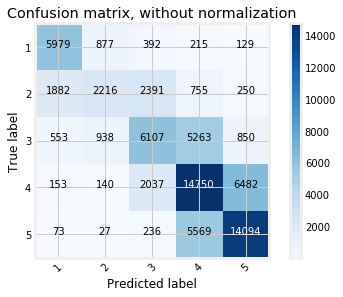

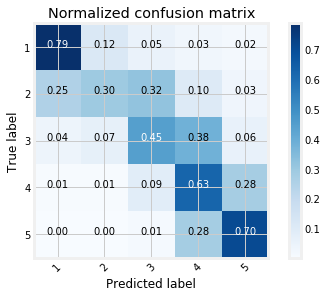

In [94]:
from sklearn import metrics
names = ['1','2','3','4','5']

# Compute confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, preds)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()